<a href="https://colab.research.google.com/github/darsh0820/Deep-Learning_Image-Classification/blob/main/CNN.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Convolutional Neural Network

##Importing Libraries

In [2]:
import tensorflow as tf
from tensorflow.keras import layers, models, datasets, utils

##Preparing the data

### Loading dataset

In [3]:
(x_train, y_train), (x_test, y_test) = datasets.mnist.load_data()

11490434/11490434 [==============================] - 0s 0us/step


### Reshape the data

In [4]:
x_train = x_train.reshape((x_train.shape[0], 28, 28, 1)).astype('float32') / 255
x_test = x_test.reshape((x_test.shape[0], 28, 28, 1)).astype('float32') / 255

### Encoding the labels

In [5]:
y_train = utils.to_categorical(y_train, 10)
y_test = utils.to_categorical(y_test, 10)

##Creating the model

### Create the model

In [6]:
model = models.Sequential()

### Adding Layers

In [7]:
# First convolutional layer with 32 filters and 3x3 kernel size
model.add(layers.Conv2D(32, (3, 3), activation='relu', input_shape=(28, 28, 1)))
model.add(layers.BatchNormalization())
model.add(layers.MaxPooling2D((2, 2)))

# Second convolutional layer with 64 filters and 3x3 kernel size
model.add(layers.Conv2D(64, (3, 3), activation='relu'))
model.add(layers.BatchNormalization())
model.add(layers.MaxPooling2D((2, 2)))

# Flatten the output from the convolutional layers
model.add(layers.Flatten())

# Dense layer with 128 neurons
model.add(layers.Dense(128, activation='relu'))
model.add(layers.BatchNormalization())

# Output layer with 10 neurons for the 10 classes (digits 0-9) using softmax activation
model.add(layers.Dense(10, activation='softmax'))

### Compiling with optimizer and loss function

In [8]:

model.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

### Summarizing the model

In [10]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 26, 26, 32)        320       
                                                                 
 batch_normalization (Batch  (None, 26, 26, 32)        128       
 Normalization)                                                  
                                                                 
 max_pooling2d (MaxPooling2  (None, 13, 13, 32)        0         
 D)                                                              
                                                                 
 conv2d_1 (Conv2D)           (None, 11, 11, 64)        18496     
                                                                 
 batch_normalization_1 (Bat  (None, 11, 11, 64)        256       
 chNormalization)                                                
                                                        

##Training the model

In [11]:
history = model.fit(x_train, y_train, epochs=5, batch_size=32, verbose=1)

Epoch 1/5
1875/1875 [==============================] - 24s 12ms/step - loss: 0.0919 - accuracy: 0.9730
Epoch 2/5
1875/1875 [==============================] - 22s 12ms/step - loss: 0.0399 - accuracy: 0.9875
Epoch 3/5
1875/1875 [==============================] - 22s 12ms/step - loss: 0.0299 - accuracy: 0.9908
Epoch 4/5
1875/1875 [==============================] - 22s 12ms/step - loss: 0.0230 - accuracy: 0.9926
Epoch 5/5
1875/1875 [==============================] - 22s 12ms/step - loss: 0.0178 - accuracy: 0.9942


##Model Evaluation

In [12]:
test_loss, test_acc = model.evaluate(x_test, y_test, verbose=2)
print(f'\nTest accuracy: {test_acc}')

313/313 - 1s - loss: 0.0284 - accuracy: 0.9921 - 1s/epoch - 4ms/step

Test accuracy: 0.9921000003814697


##Plotting prediction results

### Predicted values

313/313 [==============================] - 1s 4ms/step


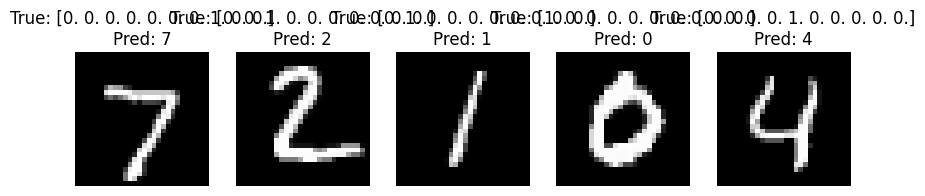

In [13]:
import matplotlib.pyplot as plt
import numpy as np

predictions = model.predict(x_test)

def plot_images(images, labels, predictions, num_images=5):
    plt.figure(figsize=(10, 5))
    for i in range(num_images):
        plt.subplot(1, num_images, i + 1)
        plt.imshow(images[i].reshape(28, 28), cmap='gray')
        plt.title(f"True: {labels[i]}\nPred: {np.argmax(predictions[i])}")
        plt.axis('off')
    plt.show()

plot_images(x_test, y_test, predictions)

###Confusion matrix

In [14]:
from sklearn.metrics import confusion_matrix
import seaborn as sns

In [15]:
# Convert predicted probabilities to class labels
predictions = np.argmax(predictions, axis=1)

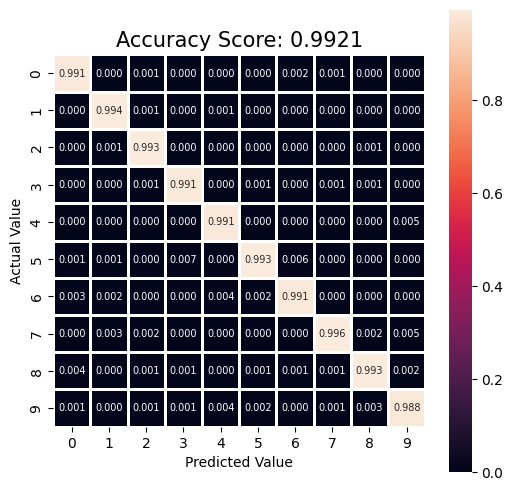

In [16]:
#Convert y_test to single-integer format if it's one-hot encoded
if y_test.ndim == 2:
    y_test = np.argmax(y_test, axis=1)

cm = confusion_matrix(y_test, predictions , normalize='pred')

plt.figure(figsize=(6,6))
sns.heatmap(cm, annot=True, fmt=".3f", linewidths=.75, square = True, annot_kws={"size": 7})
plt.ylabel('Actual Value')
plt.xlabel('Predicted Value')
plt.title('Accuracy Score: {:.4f}'.format(test_acc), size = 15)
plt.show()